In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(color_codes=True)

In [3]:
df = pd.read_csv('t20i_Matches_Data.csv')

In [4]:
display(df.head())

,T20I Match No,Match ID,Match Name,Series ID,Series Name,Match Date,Match Format,Team1 ID,Team1 Name,Team1 Captain,...,Umpire 2,Match Referee,Toss Winner,Toss Winner Choice,Match Winner,Match Result Text,MOM Player,Team1 Playing 11,Team2 Playing 11,Debut Players
0,52,291356,Australia Vs India Only T20I,291355,India tour of Australia - 2007 (2007/08),2008-02-01,T20,6,India,7593,...,SJA Taufel,JJ Crowe,India,bat,Australia,Australia won by 9 wickets (with 52 balls rema...,8876.0,"['7773', '7781', '8813', '8742', '48405', '759...","['4176', '8876', '6253', '6256', '4382', '1198...","['11984', '49327', '48319']"
1,54,300436,New Zealand Vs England 2Nd T20I,300418,England tour of New Zealand - 2008 (2007/08),2008-02-07,T20,1,England,2314,...,GAV Baxter,AG Hurst,England,bat,England,England won by 50 runs,2314.0,"['11556', '44660', '8107', '7822', '2314', '63...","['44946', '10384', '44930', '10381', '9570', '...","['47488', '10325']"
2,65,361531,Netherlands Vs Scotland 2Nd Semi Final,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,30,Scotland,45548,...,PK Baldwin,BC Broad,Netherlands,bowl,Netherlands,Netherlands won by 5 wickets (with 12 balls re...,45358.0,"['45548', '46048', '46142', '8221', '4334', '4...","['10323', '48655', '6362', '49443', '45358', '...",[]
3,66,354459,Kenya Vs Scotland 3Rd Place Playoff,353665,"ICC World Twenty20 Qualifier Bermuda, Canada, ...",2008-08-04,T20,26,Kenya,2265,...,PK Baldwin,BC Broad,Kenya,bat,Scotland,Scotland won by 9 wickets (with 11 balls remai...,45548.0,"['10364', '2264', '49383', '2265', '2268', '50...","['45548', '46048', '46142', '8221', '4334', '4...","['50293', '50293']"
4,69,361653,Sri Lanka Vs Zimbabwe 1St Match,361644,T20 Canada in Canada - 2008 (2008/09),2008-10-10,T20,9,Zimbabwe,45326,...,MR Benson,JJ Crowe,Sri Lanka,bowl,Sri Lanka,Sri Lanka won by 5 wickets (with 6 balls remai...,50377.0,"['10639', '10423', '47619', '10421', '21364', ...","['48468', '7419', '15273', '8195', '6315', '48...","['50377', '47210', '12209', '15273', '48468', ..."


In [5]:
print(list(df.columns))

['T20I Match No', 'Match ID', 'Match Name', 'Series ID', 'Series Name', 'Match Date', 'Match Format', 'Team1 ID', 'Team1 Name', 'Team1 Captain', 'Team1 Runs Scored', 'Team1 Wickets Fell', 'Team1 Extras Rec', 'Team2 ID', 'Team2 Name', 'Team2 Captain', 'Team2 Runs Scored', 'Team2 Wickets Fell', 'Team2 Extras Rec', 'Match Venue (Stadium)', 'Match Venue (City)', 'Match Venue (Country)', 'Umpire 1', 'Umpire 2', 'Match Referee', 'Toss Winner', 'Toss Winner Choice', 'Match Winner', 'Match Result Text', 'MOM Player', 'Team1 Playing 11', 'Team2 Playing 11', 'Debut Players']


In [6]:
#. Remove the irrelevant columns

df= df.drop(['MOM Player','Match Result Text','T20I Match No','Match ID','Series ID','Series Name','Match Format','Team1 ID','Team2 ID','Team1 Captain','Team2 Captain','Umpire 1','Umpire 2','Match Referee','Team1 Playing 11','Team2 Playing 11','Debut Players','Match Name','Team2 Extras Rec','Team1 Extras Rec','Match Date'],axis=1)
df.head(5)

,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner
0,India,74.0,10.0,Australia,75.0,1.0,Melbourne Cricket Ground,Melbourne,Australia,India,bat,Australia
1,England,193.0,8.0,New Zealand,143.0,8.0,Jade Stadium,Christchurch,New Zealand,England,bat,England
2,Scotland,107.0,8.0,Netherlands,110.0,5.0,Civil Service Cricket Club,Belfast,Ireland,Netherlands,bowl,Netherlands
3,Kenya,106.0,9.0,Scotland,107.0,1.0,Civil Service Cricket Club,Belfast,Ireland,Kenya,bat,Scotland
4,Zimbabwe,106.0,8.0,Sri Lanka,107.0,5.0,Maple Leaf North-West Ground,King City,Canada,Sri Lanka,bowl,Sri Lanka


In [7]:
#print number of duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 12)


In [8]:
#remove the rows that have been duplicate values
df = df.drop_duplicates()
df.head(5)


,Team1 Name,Team1 Runs Scored,Team1 Wickets Fell,Team2 Name,Team2 Runs Scored,Team2 Wickets Fell,Match Venue (Stadium),Match Venue (City),Match Venue (Country),Toss Winner,Toss Winner Choice,Match Winner
0,India,74.0,10.0,Australia,75.0,1.0,Melbourne Cricket Ground,Melbourne,Australia,India,bat,Australia
1,England,193.0,8.0,New Zealand,143.0,8.0,Jade Stadium,Christchurch,New Zealand,England,bat,England
2,Scotland,107.0,8.0,Netherlands,110.0,5.0,Civil Service Cricket Club,Belfast,Ireland,Netherlands,bowl,Netherlands
3,Kenya,106.0,9.0,Scotland,107.0,1.0,Civil Service Cricket Club,Belfast,Ireland,Kenya,bat,Scotland
4,Zimbabwe,106.0,8.0,Sri Lanka,107.0,5.0,Maple Leaf North-West Ground,King City,Canada,Sri Lanka,bowl,Sri Lanka


# Handling missing data

In [9]:
#count the row after removing duplicate data
df.count()

Team1 Name               2592
Team1 Runs Scored        2579
Team1 Wickets Fell       2579
Team2 Name               2592
Team2 Runs Scored        2542
Team2 Wickets Fell       2542
Match Venue (Stadium)    2592
Match Venue (City)       2592
Match Venue (Country)    2592
Toss Winner              2591
Toss Winner Choice       2582
Match Winner             2494
dtype: int64

In [10]:
#Count missing values per column
print(df.isnull().sum())

Team1 Name                0
Team1 Runs Scored        13
Team1 Wickets Fell       13
Team2 Name                0
Team2 Runs Scored        50
Team2 Wickets Fell       50
Match Venue (Stadium)     0
Match Venue (City)        0
Match Venue (Country)     0
Toss Winner               1
Toss Winner Choice       10
Match Winner             98
dtype: int64


# drop the missing value in Toss Winner column

In [11]:
df = df.dropna(subset=['Toss Winner'])

In [12]:
#Count missing values per column
print(df.isnull().sum())

Team1 Name                0
Team1 Runs Scored        13
Team1 Wickets Fell       13
Team2 Name                0
Team2 Runs Scored        50
Team2 Wickets Fell       50
Match Venue (Stadium)     0
Match Venue (City)        0
Match Venue (Country)     0
Toss Winner               0
Toss Winner Choice       10
Match Winner             98
dtype: int64


# Filling with average values in Team1 Runs Scored, Team2 Runs Scored, Team1 Wickets Fell and Team2 Wickets Fell columns

In [13]:
# Calculate the mean
mean_team1_runs = df['Team1 Runs Scored'].mean()
print("Mean of Team1 Runs Scored:", mean_team1_runs)

# Fill missing values safely
df['Team1 Runs Scored'] = df['Team1 Runs Scored'].fillna(mean_team1_runs)

Mean of Team1 Runs Scored: 147.73157486423585


In [14]:
# Calculate the mean
mean_team2_runs = df['Team2 Runs Scored'].mean()
print("Mean of Team2 Runs Scored:",mean_team2_runs)

# Fill missing values safely
df['Team2 Runs Scored'] = df['Team2 Runs Scored'].fillna(mean_team2_runs)

Mean of Team2 Runs Scored: 126.54820936639119


In [15]:
# Calculate the mean
mean_team1_wickets = df['Team1 Wickets Fell'].mean()
print("Mean of Team1 Wickets Fell",mean_team1_wickets)

# Fill missing values safely
df['Team1 Wickets Fell'] = df['Team1 Wickets Fell'].fillna(mean_team1_wickets)

Mean of Team1 Wickets Fell 6.847168347556245


In [16]:
# Calculate the mean
mean_team2_wickets = df['Team2 Wickets Fell'].mean()
print("Mean of Team2 Wickets Fell:",mean_team2_wickets)

# Fill missing values safely
df['Team2 Wickets Fell'] = df['Team2 Wickets Fell'].fillna(mean_team2_wickets)

Mean of Team2 Wickets Fell: 6.035812672176308


In [17]:
#Count missing values per column
print(df.isnull().sum())

Team1 Name                0
Team1 Runs Scored         0
Team1 Wickets Fell        0
Team2 Name                0
Team2 Runs Scored         0
Team2 Wickets Fell        0
Match Venue (Stadium)     0
Match Venue (City)        0
Match Venue (Country)     0
Toss Winner               0
Toss Winner Choice       10
Match Winner             98
dtype: int64


# set null/matched called off statement for missing values in Toss Winner Choice and Match Winner columns

In [18]:
# Fill missing values
df['Toss Winner Choice'] = df['Toss Winner Choice'].fillna('match called off')
df['Match Winner'] = df['Match Winner'].fillna('no result')

# Count after replacement
new_null_toss = df['Toss Winner Choice'].isnull().sum()
new_null_match = df['Match Winner'].isnull().sum()
match_off_count = (df['Match Winner'] == 'no result').sum()

print("\nAfter replacement:")
print(f"Toss Winner Choice missing values: {new_null_toss}")
print(f"Match Winner missing values: {new_null_match}")
print(f"Total 'no result' entries in Match Winner: {match_off_count}")


After replacement:
Toss Winner Choice missing values: 0
Match Winner missing values: 0
Total 'no result' entries in Match Winner: 98


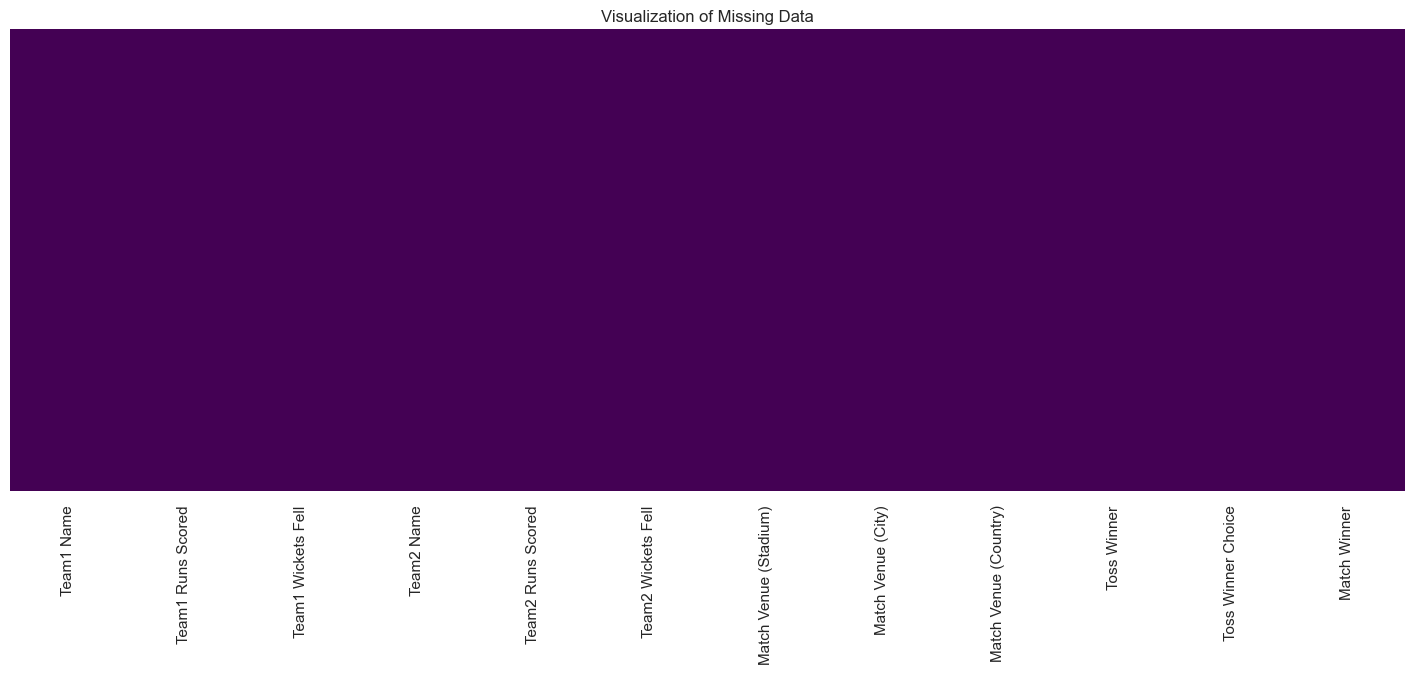

In [20]:
# Visualize missing data using a heatmap
plt.figure(figsize=(18, 6))
# A heatmap plots True (missing) values as a different color (cbar=False removes the legend)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualization of Missing Data')
plt.show()